## CNN Fundamental on MNIST Dataset

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import cv2

In [3]:
# Load MNIST Dataset From Keras Datasets
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
# Scaling the Image
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [6]:
# Reshape the Data
train_images = np.expand_dims(train_images,axis=-1)
test_images = np.expand_dims(test_images,axis=-1)
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [7]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
train_labels.shape

(60000, 10)

In [9]:
# Split the Train data into Train and Validation
train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_images, train_labels, test_size=0.20, random_state=42
)

In [10]:
train_images.shape, train_labels.shape

((48000, 28, 28, 1), (48000, 10))

In [11]:
validation_images.shape, validation_labels.shape

((12000, 28, 28, 1), (12000, 10))

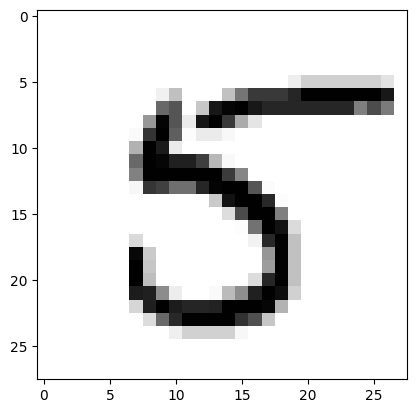

In [12]:
# Show a single Image
plt.imshow(train_images[0], cmap='binary')
plt.show()

In [13]:
# Make the Convoulation Layers
layers = [
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu', padding='same', name='convLayer01'),
    tf.keras.layers.MaxPool2D((2,2), name='MaxPoolingLayer01'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', name='convLayer02'),
    tf.keras.layers.MaxPool2D((2,2), name='MaxPoolingLayer02'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', name='denseLayer01'),
    tf.keras.layers.Dense(10, activation='softmax', name='outputLayer')
]

model_clf = tf.keras.models.Sequential(layers)

In [14]:
model_clf.layers

In [15]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convLayer01 (Conv2D)        (None, 28, 28, 32)        320       
                                                                 
 MaxPoolingLayer01 (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 convLayer02 (Conv2D)        (None, 14, 14, 64)        18496     
                                                                 
 MaxPoolingLayer02 (MaxPooli  (None, 7, 7, 64)         0         
 ng2D)                                                           
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 denseLayer01 (Dense)        (None, 64)                2

In [16]:
# Compile the Model
loss_function = 'categorical_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

model_clf.compile(loss=loss_function, optimizer=optimizer, metrics=metrics)

In [17]:
# Train the Model
validation_set = (validation_images, validation_labels)
checkpoint = ModelCheckpoint(
    filepath='artifacts/cnn_mnist.h5',
    save_weights_only=False,
    save_best_only=True
)
history = model_clf.fit(train_images, train_labels, epochs=10, batch_size=100, validation_data=validation_set, callbacks=[checkpoint], verbose=1)

Epoch 1/10
480/480 [==============================] - 15s 31ms/step - loss: 0.2199 - accuracy: 0.9353 - val_loss: 0.0806 - val_accuracy: 0.9753
Epoch 2/10
480/480 [==============================] - 15s 31ms/step - loss: 0.0591 - accuracy: 0.9820 - val_loss: 0.0483 - val_accuracy: 0.9861
Epoch 3/10
480/480 [==============================] - 15s 31ms/step - loss: 0.0423 - accuracy: 0.9866 - val_loss: 0.0470 - val_accuracy: 0.9863
Epoch 4/10
480/480 [==============================] - 14s 30ms/step - loss: 0.0323 - accuracy: 0.9895 - val_loss: 0.0372 - val_accuracy: 0.9886
Epoch 5/10
480/480 [==============================] - 15s 30ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0385 - val_accuracy: 0.9887
Epoch 6/10
480/480 [==============================] - 20s 41ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.0465 - val_accuracy: 0.9862
Epoch 7/10
480/480 [==============================] - 15s 32ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.0392 - val_accuracy:

In [18]:
# Params of the Trained Model
history.params

{'verbose': 1, 'epochs': 10, 'steps': 480}

In [19]:
# History of the Model Training
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.219859,0.935313,0.080569,0.975250
1,0.059114,0.981958,0.048349,0.986083
2,0.042348,0.986646,0.046964,0.986333
3,0.032310,0.989542,0.037202,0.988583
4,0.024103,0.992417,0.038496,0.988667
5,0.019508,0.993646,0.046495,0.986250
6,0.016039,0.994646,0.039152,0.989083
7,0.012983,0.995792,0.040141,0.989250
8,0.009737,0.996896,0.040046,0.989083
9,0.008863,0.996792,0.056542,0.986333


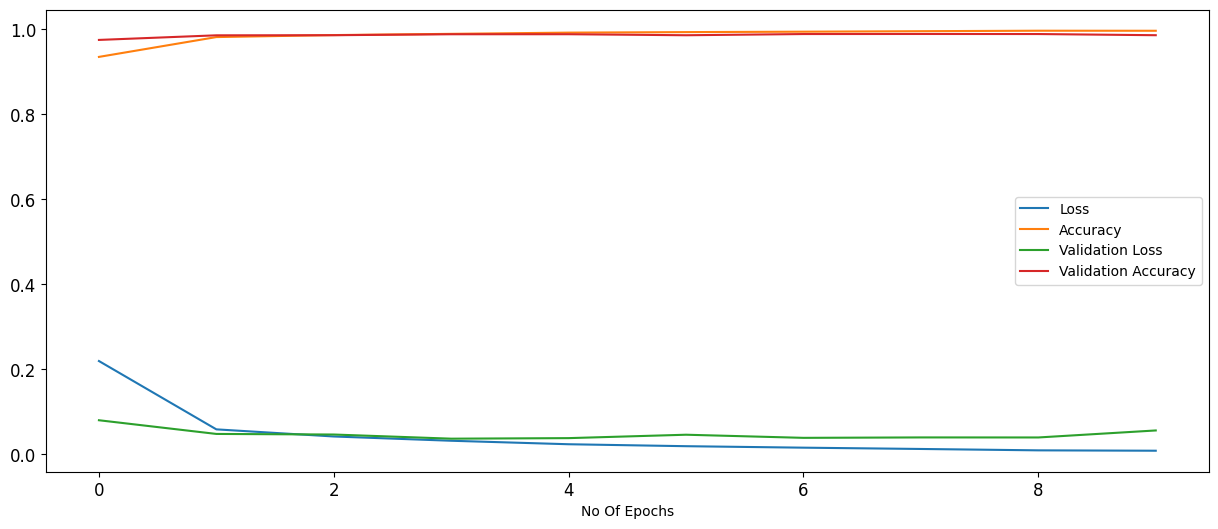

In [20]:
# Plot Loss and Accuracy From the History
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(history.history))
plt.xlabel("No Of Epochs")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Loss','Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

In [21]:
# Evaluate the Model
model_clf.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0458 - accuracy: 0.9871


[0.045800261199474335, 0.9871000051498413]

In [22]:
x_actual = train_images[4]
x_actual.shape

(28, 28, 1)

In [23]:
np.expand_dims(x_actual, axis=0).shape

(1, 28, 28, 1)

In [24]:
# Predict the Model
x_actual = train_images[7]
y_actual = train_labels[7]
y_predict = model_clf.predict(np.expand_dims(x_actual, axis=0))
np.argmax(y_predict)

1/1 [==============================] - 0s 62ms/step


8

In [25]:
np.argmax(y_actual)

8

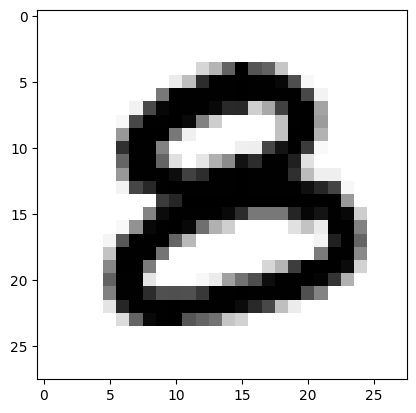

In [26]:
plt.imshow(x_actual, cmap='binary')
plt.show()

In [28]:
# Load the Model
model = load_model('artifacts/cnn_mnist.h5')

In [29]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9902


[0.029696399345993996, 0.9901999831199646]

In [65]:
input_image = cv2.imread('artifacts/hw_number.png')
input_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

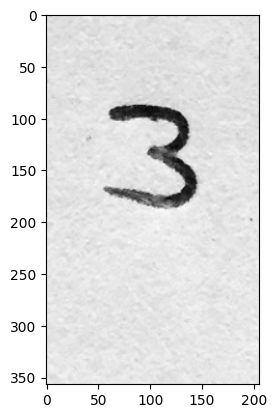

In [66]:
plt.imshow(input_image, cmap='gray')
plt.show()

In [67]:
input_image = cv2.resize(input_image, (28,28))
input_image = np.expand_dims(input_image, axis=0)
input_image.shape

(1, 28, 28)

In [70]:
# Predict the Number from the image
y_pred = model.predict(input_image)
np.argmax(y_pred)

1/1 [==============================] - 0s 15ms/step


3